# <span style="color:STEELBLUE">**Set Up**</span>

### Import libraries and data

In [36]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive



In [37]:
file = "/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/master_df_20191021.xlsx"
data = pd.read_excel(file)
df_master = pd.DataFrame(data).set_index('FIPS')

In [38]:
print(df_master.columns)

Index(['Prop_SFHA_', 'Prop_DG_Ar', 'Ave_LS_cod', 'DG_MaxDe_1', 'HurTrack_D',
       'PeakGust_1', 'MaxSusta_1', 'Count_', 'StrVI', 'SeVI', 'Str+SeVI',
       'SoVI', 'DG_mean_m', 'O_Ind', 'R_Ind', 'R_I_No0', 'R_I_NoO',
       'R_I_No0_NoO', 'cat_3q', 'cat_4q'],
      dtype='object')


### Choose Data

In [39]:
def choose_data(df_master, feature_list, target_list):
    choices = feature_list + target_list
    df = df_master[choices].copy()
    df.dropna(inplace = True)
    return df

In [40]:
# EXAMPLE:
feature_list = ['Prop_SFHA_', 'Prop_DG_Ar', 'Ave_LS_cod', 'HurTrack_D',
                'MaxSusta_1', 'StrVI', 'SeVI', 'DG_mean_m']
target_list = ['R_Ind']

df = choose_data(df_master, feature_list, target_list)

In [41]:
def partition_data(df, target_str):
    y = df[target_str]
    df_x = df.drop(target_str, axis = 1)
    return y, df_x

In [42]:
# EXAMPLE:
target_str = 'R_Ind'
y, df_x = partition_data(df, target_str)

# <span style="color:STEELBLUE">**Tree Visualization**</span>


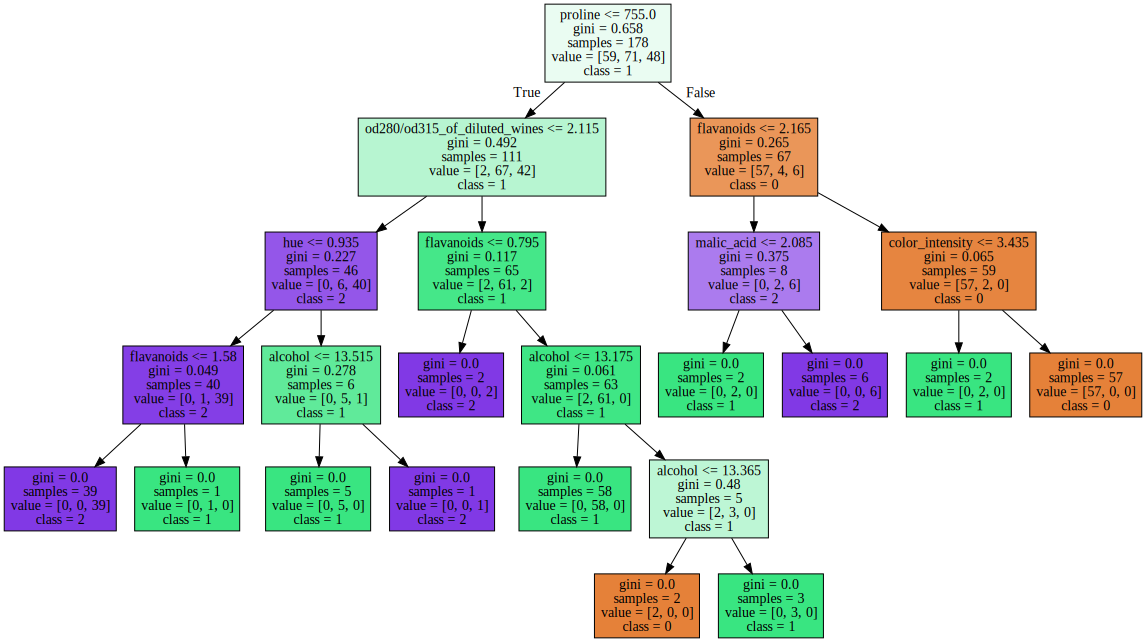

In [43]:
# load dataset
data = load_wine()

# feature matrix
X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names

# print dataset description
#print(data.DESCR)
estimator = DecisionTreeClassifier()
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

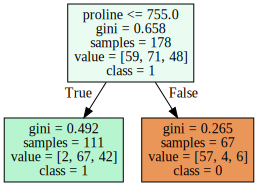

In [58]:
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = crit
          , splitter = split
          , max_depth = int(depth)
          , min_samples_split=min_split
          , min_samples_leaf=min_leaf)
    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator
          , out_file=None
          , feature_names=labels
          , class_names=['0', '1', '2']
          , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))

display(inter)

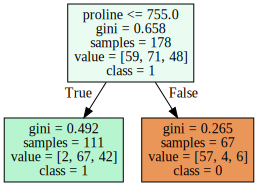

In [60]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
# load dataset
data = load_wine()
# feature matrix
X = data.data
# target vector
y = data.target
# class labels
labels = data.feature_names
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
  estimator = DecisionTreeClassifier(random_state = 0 
        , criterion = crit
        , splitter = split
        , max_depth = depth
        , min_samples_split=min_split
        , min_samples_leaf=min_leaf)
  
  estimator.fit(X, y)
  
  graph = Source(tree.export_graphviz(estimator
        , out_file=None
        , feature_names=labels
        , class_names=['0', '1', '2']
        , filled = True))
  
  display(SVG(graph.pipe(format='svg')))
  
  return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,6]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))

display(inter)